# Master M2 MVA 2018/2019 - Graphical models - HWK 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils.LDA import LDA
from utils.LogisticRegression import LogisticRegression
from utils.LinearRegression import LinearRegression
from utils.QDA import QDA

#### Load datasets sets

In [2]:
train_A = pd.read_table("data/classificationA.train", header=None)
train_B = pd.read_table("data/classificationB.train", header=None)
train_C = pd.read_table("data/classificationC.train", header=None)
test_A = pd.read_table("data/classificationA.test", header=None)
test_B = pd.read_table("data/classificationB.test", header=None)
test_C = pd.read_table("data/classificationC.test", header=None)

print "Shape train A : ", train_A.shape
print "Shape train B : ", train_B.shape
print "Shape train C : ", train_C.shape

print "Shape test A : ", test_A.shape
print "Shape test B : ", test_B.shape
print "Shape test C : ", test_C.shape

print "A - 1: " + str(len(train_A.loc[train_A[2]==1])) + " - 0: " + str(len(train_A.loc[train_A[2]==0]))
print "B - 1: " + str(len(train_B.loc[train_B[2]==1])) + " - 0: " + str(len(train_B.loc[train_B[2]==0]))
print "C - 1: " + str(len(train_C.loc[train_C[2]==1])) + " - 0: " + str(len(train_C.loc[train_C[2]==0]))

train_A = train_A.values
train_B = train_B.values
train_C = train_C.values
test_A = test_A.values
test_B = test_B.values
test_C = test_C.values

Shape train A :  (150, 3)
Shape train B :  (300, 3)
Shape train C :  (400, 3)
Shape test A :  (1500, 3)
Shape test B :  (2000, 3)
Shape test C :  (3000, 3)
A - 1: 50 - 0: 100
B - 1: 150 - 0: 150
C - 1: 250 - 0: 150


In [3]:
train = {'A': train_A, 'B': train_B, 'C': train_C}
test = {'A': test_A, 'B': test_B, 'C': test_C}
missclassification = {'train': {}, 'test': {}}

utils/LogisticRegression.py:10: RuntimeWarning: divide by zero encountered in log
  l_w = np.sum(y*np.log(eta)) + np.sum((1-y)*np.log(1-eta))
utils/LogisticRegression.py:10: RuntimeWarning: invalid value encountered in multiply
  l_w = np.sum(y*np.log(eta)) + np.sum((1-y)*np.log(1-eta))
/Users/dieze/anaconda/envs/ptc_env/lib/python2.7/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


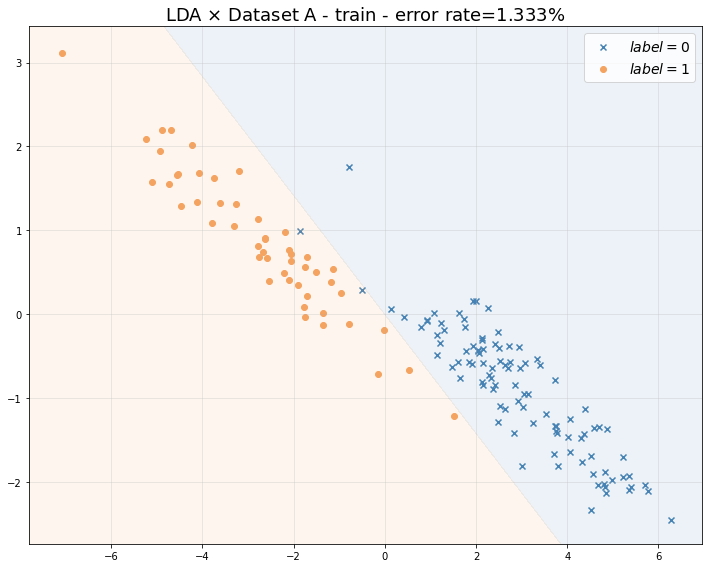

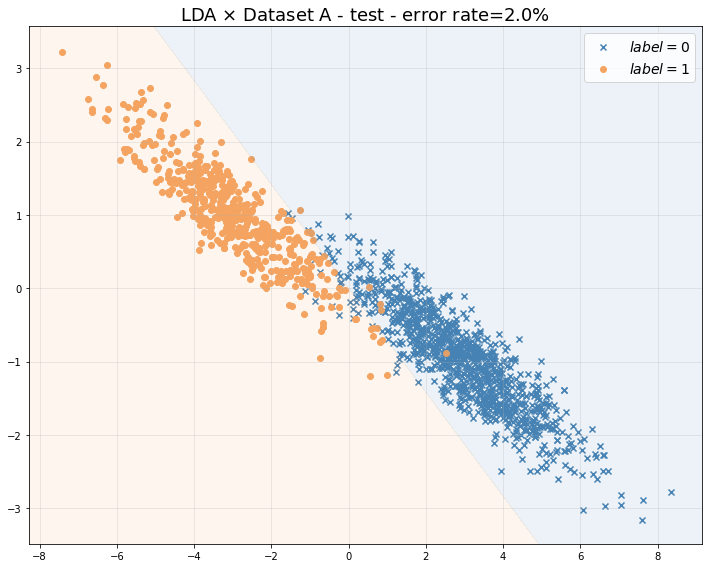

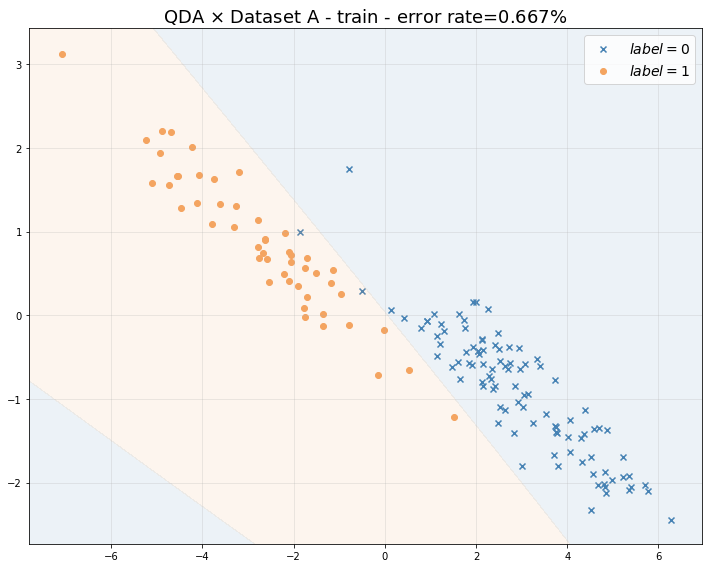

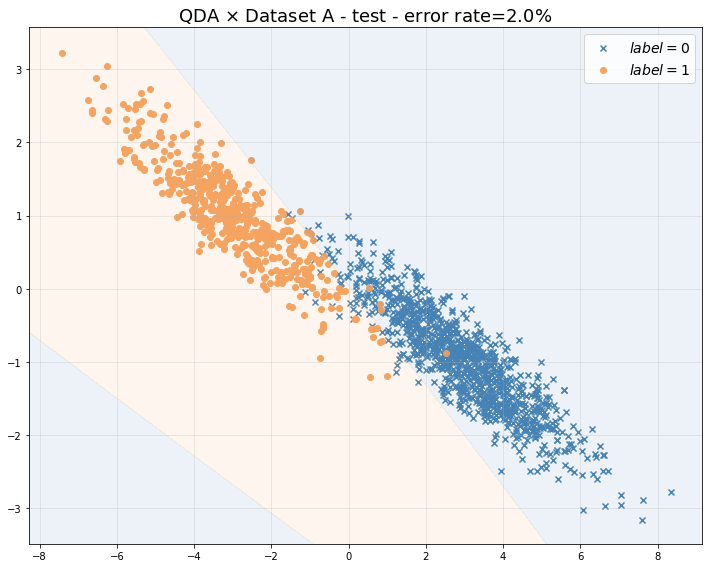

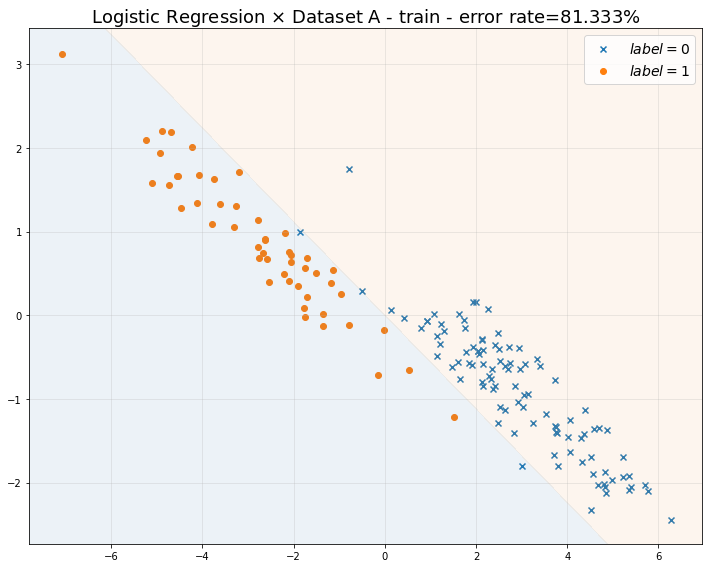

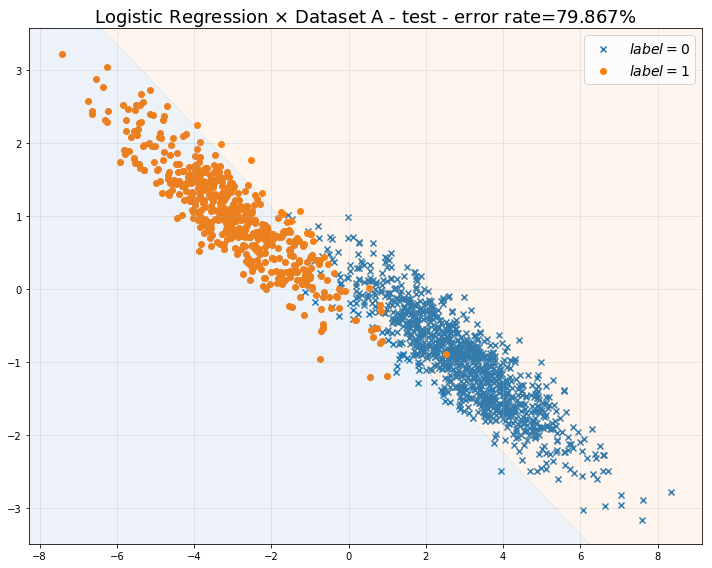

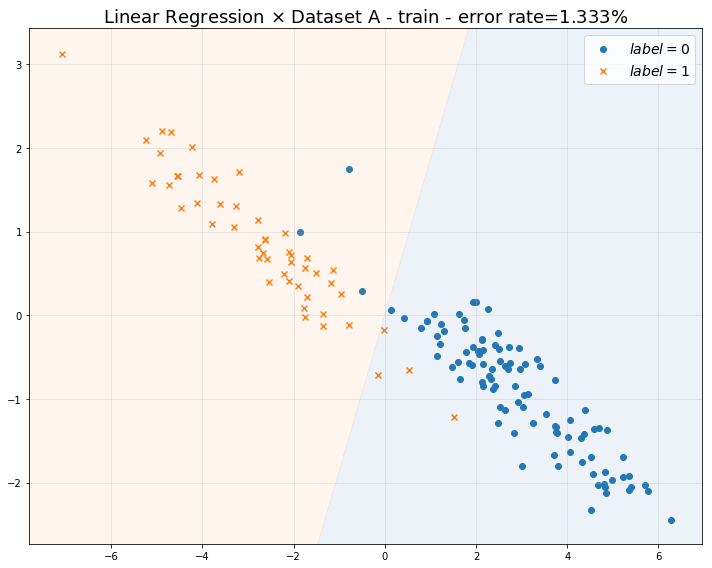

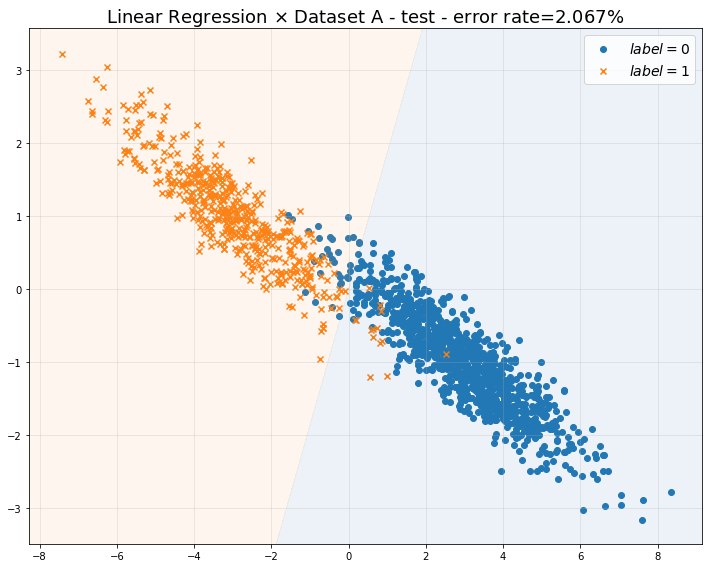

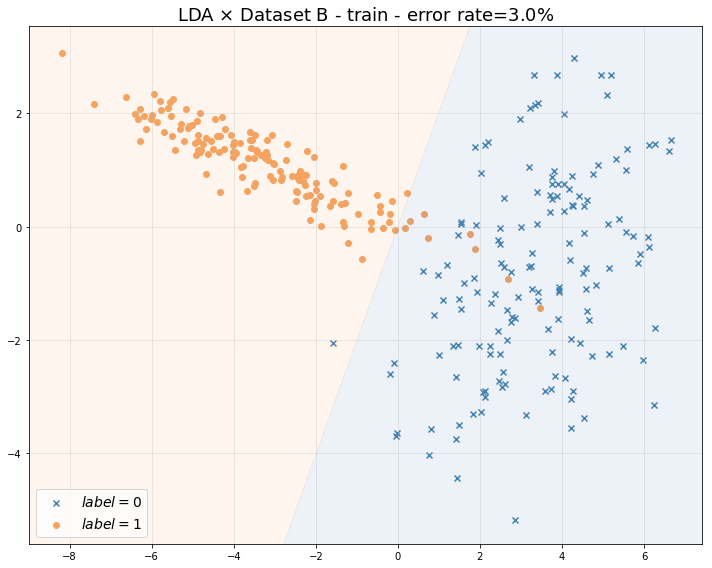

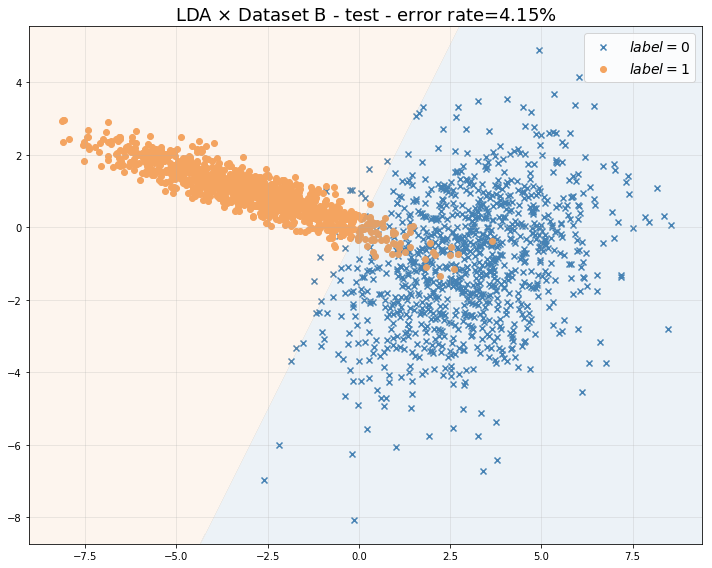

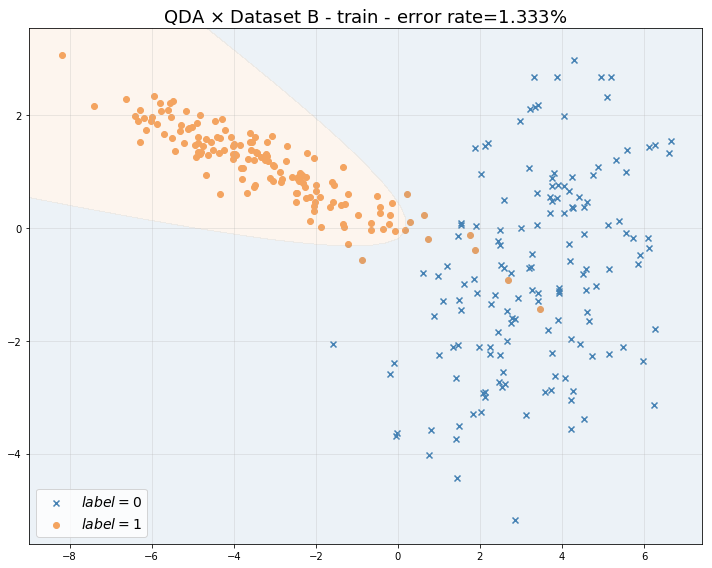

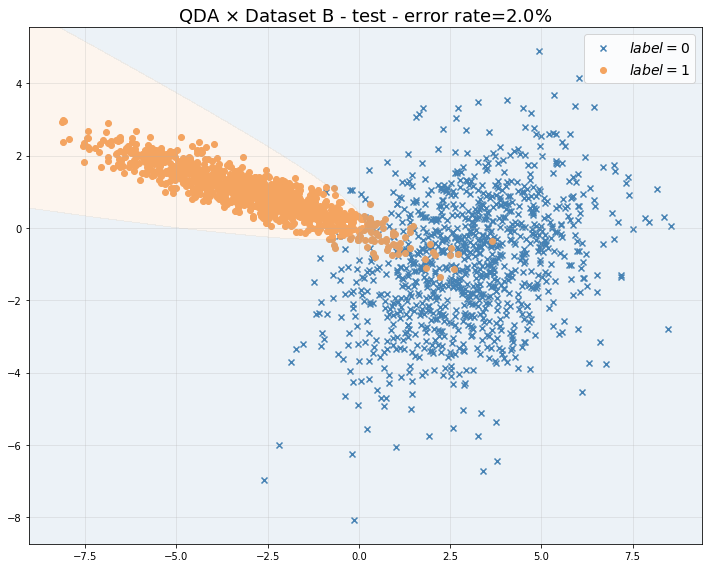

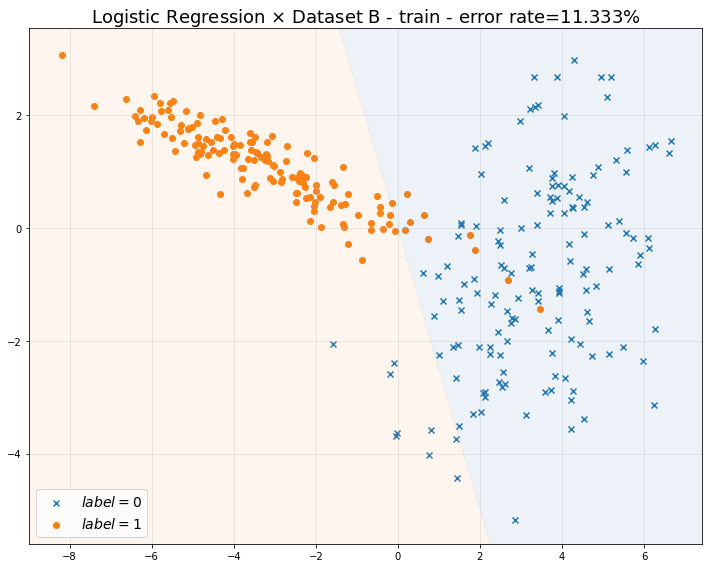

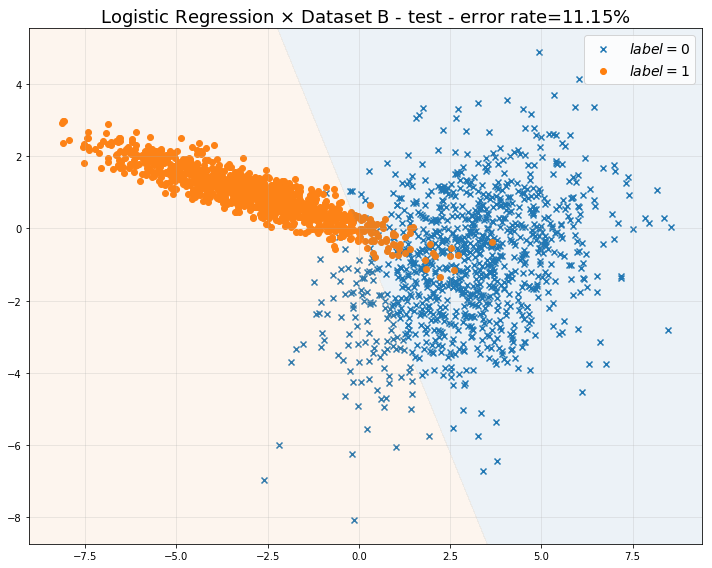

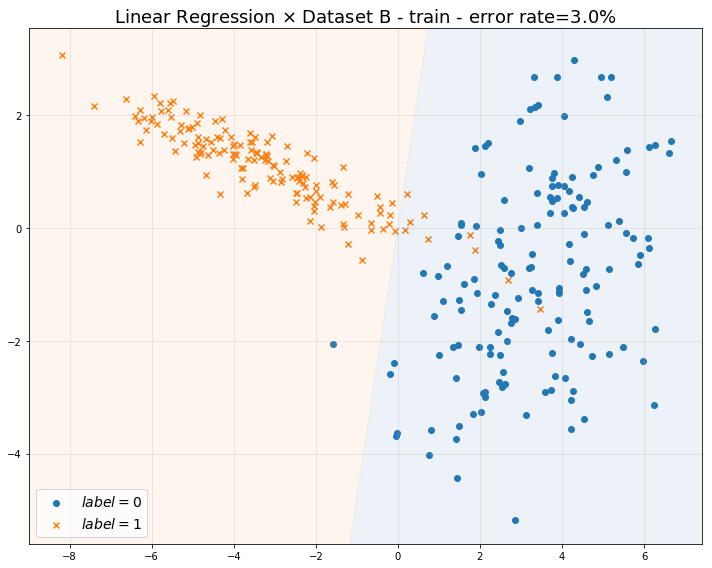

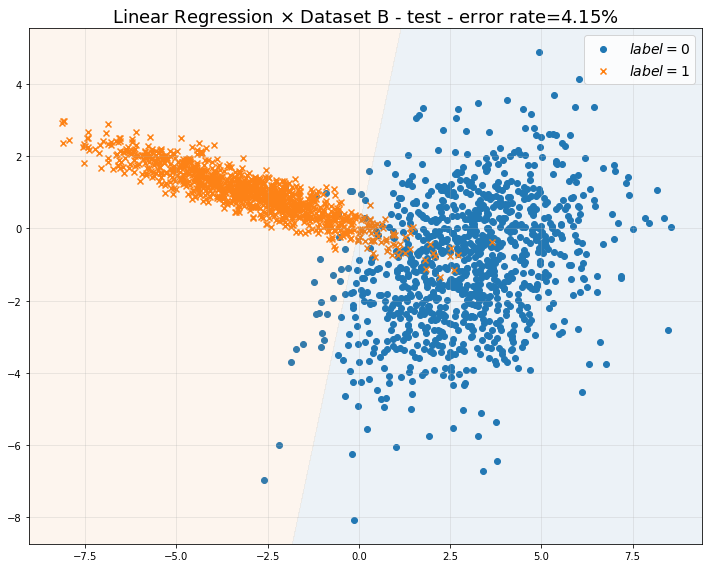

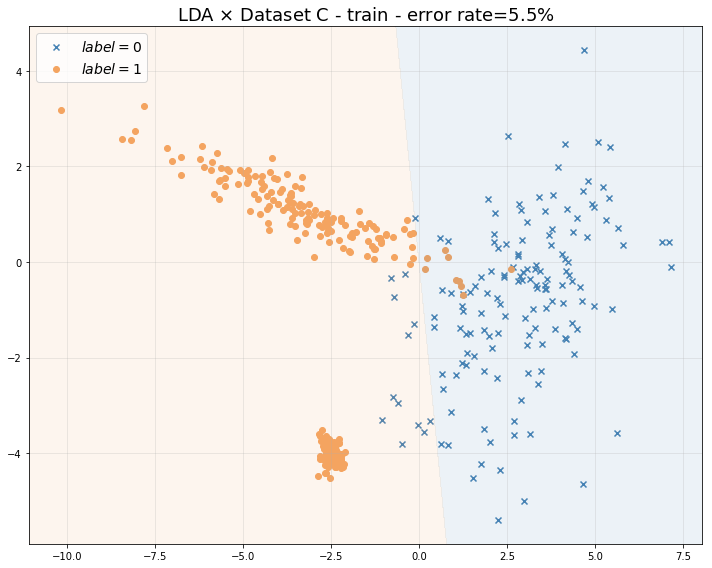

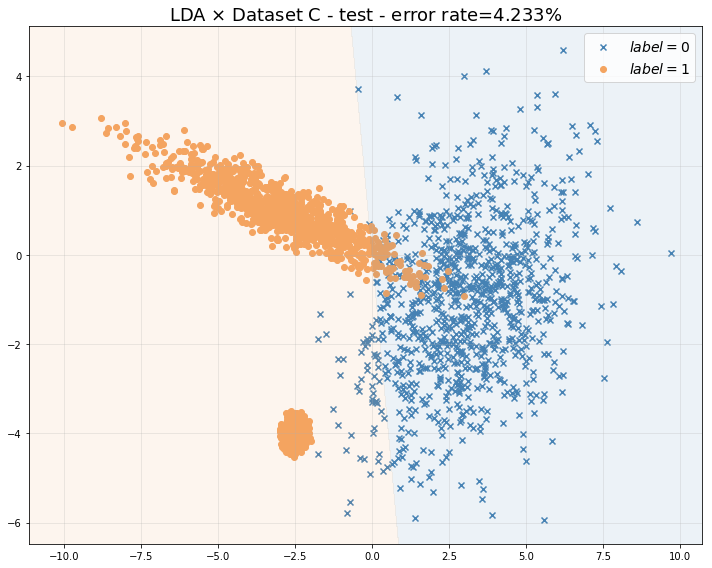

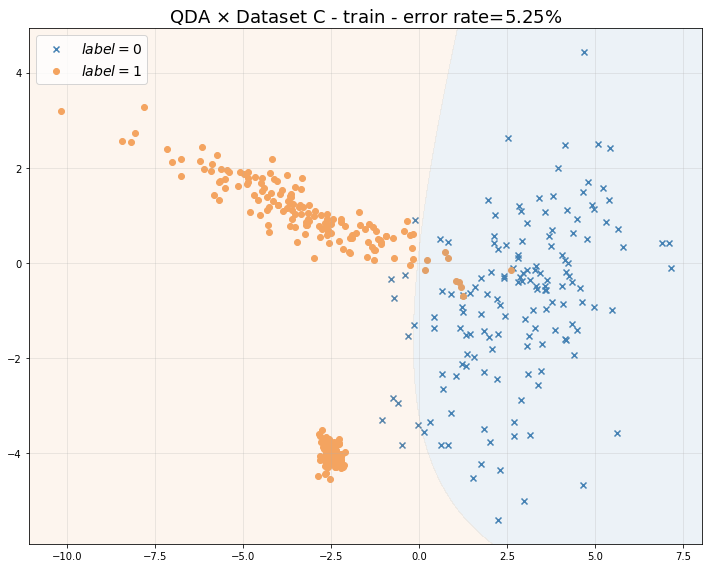

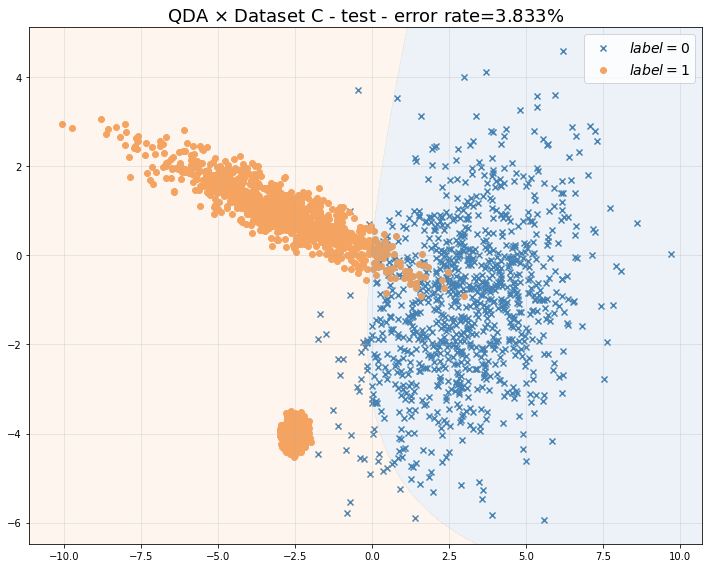

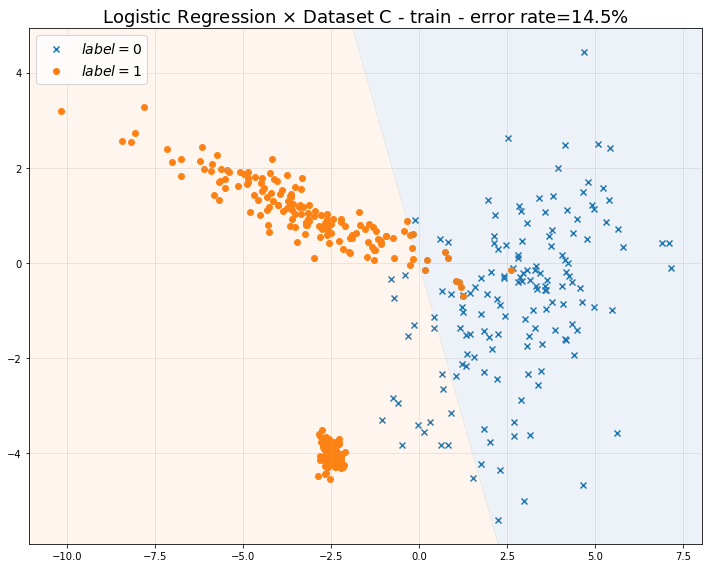

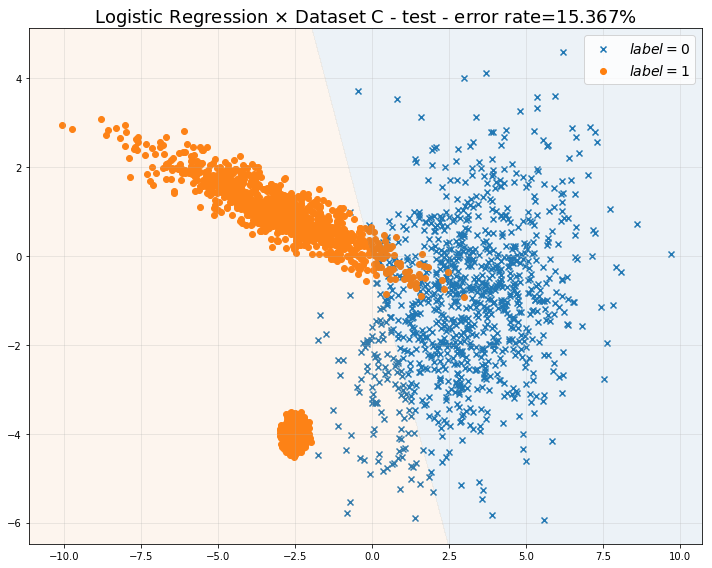

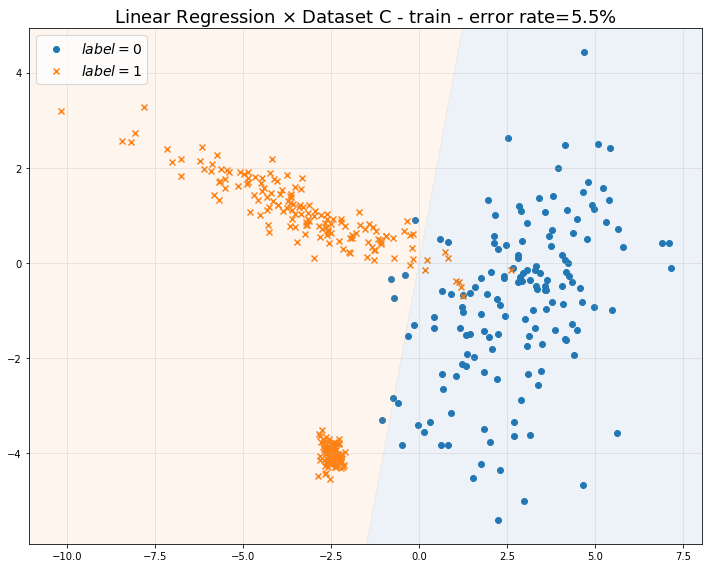

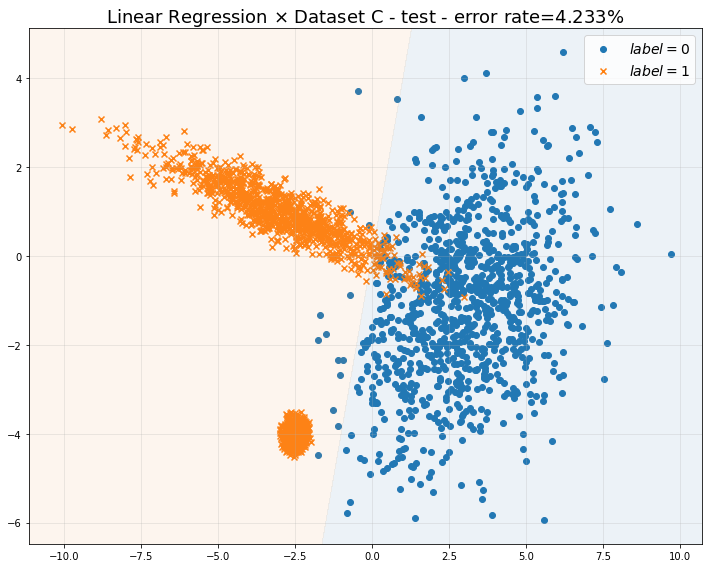

In [4]:
for key in ['A', 'B', 'C']:
    X_train = train[key][:,:2]
    y_train = train[key][:,-1]
    X_test = test[key][:,:2]
    y_test = test[key][:,-1]
    lda = LDA()
    logreg = LogisticRegression()
    linreg = LinearRegression()
    qda = QDA()
    clf = {'LDA': lda, 
           'Logistic Regression': logreg,
           'Linear Regression': linreg,
           'QDA': qda}
    
    for clf_key in clf.keys():
        clf[clf_key].fit(X_train, y_train)
        missclassification['train'][key] = clf[clf_key].missclassification(X_train, y_train)
        title = clf_key + r" $\times$ Dataset " + key + " - train - error rate="+str(round(100*missclassification['train'][key],3)) + "%"
        clf[clf_key].plot_pred(X_train, y_train, title=title)
        save_path = "_".join(["docs/img/"+clf_key, key, "train.png"])
        plt.savefig(save_path)
        
        missclassification['test'][key] = clf[clf_key].missclassification(X_test, y_test)
        title = clf_key + r" $\times$ Dataset " + key + " - test - error rate="+str(round(100*missclassification['test'][key],3)) + "%"
        clf[clf_key].plot_pred(X_test, y_test, title=title)
        save_path = "_".join(["docs/img/"+clf_key, key, "test.png"]) 
        plt.savefig(save_path)

## 1. Generative model (LDA)

$$y ∼ \mathcal{B}(\pi),\enspace x|\{y = i\} ∼ \mathcal{N}(\mu_{i}, \Sigma). $$

$$\hat{\pi} = \frac{1}{N}\sum_{i=1}^{n}y_{i}$$

$$\forall j\in\{0,1\}, \enspace\hat{\mu}_{j}=\frac{\sum_{i=1}^{n}\mathbb{1}_{\{y_{i}=j\}}x_{i}}{\sum_{i=1}^{n}\mathbb{1}_{\{y_{i}=j\}}}$$

$$\hat{\Sigma}=\frac{1}{n}\sum_{i=1}^{n}\mathbb{1}_{\{y_{i}=0\}}(x_{i}-\hat{\mu}_{0})(x_{i}-\hat{\mu}_{0})^{T}+\mathbb{1}_{\{y_{i}=1\}}(x_{i}-\hat{\mu}_{1})(x_{i}-\hat{\mu}_{1})^{T}$$

$$p(y=1|x)=\frac{1}{2} \Leftrightarrow x\perp\Sigma^{-1}(\mu_{1}-\mu_{0})$$

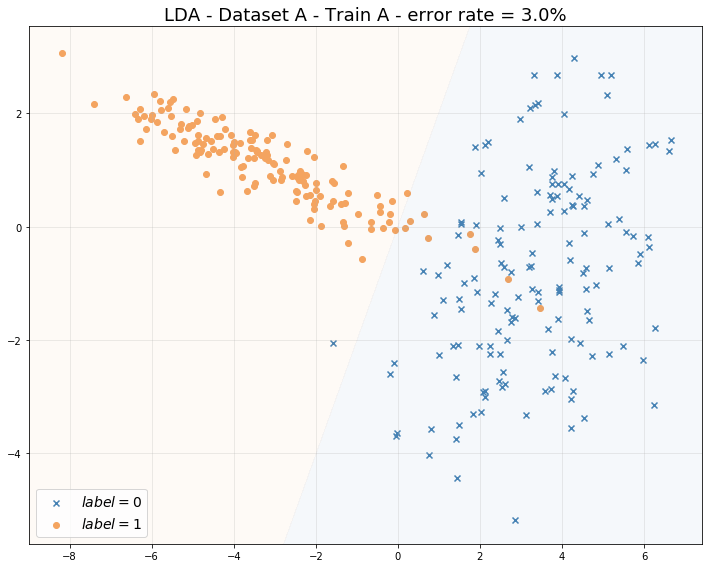

In [4]:
X = train['B'][:,:2]
y = train['B'][:,-1]
lda = LDA()
lda.fit(X, y)
missclassification_rate = round(100*lda.missclassification(X, y),3)
title ="LDA - Dataset A - Train A - error rate = " + str(missclassification_rate) + "%"
lda.plot_pred(X, y, title=title)
plt.show()

## 2. Logistic regression

$$ Y\,|\,X \sim \mathcal{B}\left(\sigma(w^{T}X+b)\right)$$

$$\mathcal{L}(\beta, w) = \ell(w) + \frac{\beta}{2}\|w\|^{2}$$

$$\nabla\mathcal{L}(\beta, w) = \nabla\ell(w) + \beta w$$

$$H\mathcal{L}(\beta, w) = H\ell(w) + \beta I$$

utils/LogisticRegression.py:10: RuntimeWarning: divide by zero encountered in log
  l_w = np.sum(y*np.log(eta)) + np.sum((1-y)*np.log(1-eta))
utils/LogisticRegression.py:10: RuntimeWarning: invalid value encountered in multiply
  l_w = np.sum(y*np.log(eta)) + np.sum((1-y)*np.log(1-eta))


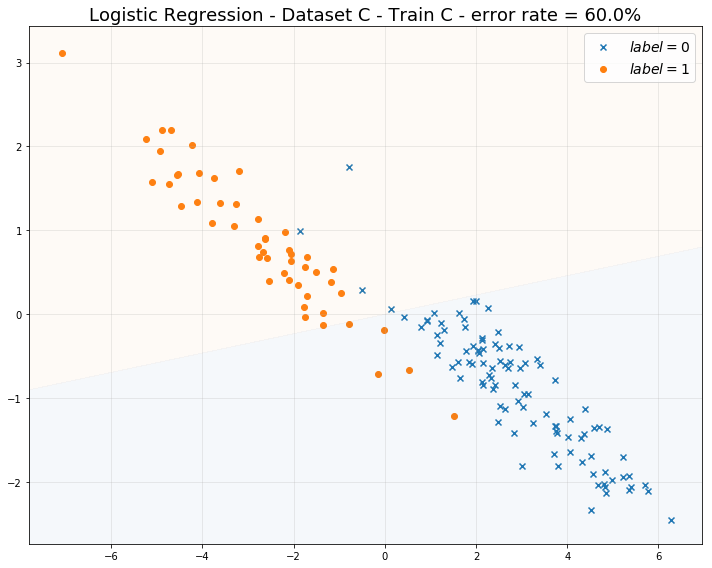

In [5]:
X = train['A'][:,:2]
y = train['A'][:,-1]
logreg = LogisticRegression()
logreg.fit(X, y)
missclassification_rate = round(100*logreg.missclassification(X, y),3)
title ="Logistic Regression - Dataset C - Train C - error rate = " + str(missclassification_rate) + "%"
logreg.plot_pred(X, y, title=title)
plt.show()

$$ Y\,|\,X\sim\mathcal{N}\left(w^{T}X,\sigma^{2}\right) $$

## 3. Linear regression

$$ \hat{w} = (X^{T}X)^{-1}X^{T}y $$

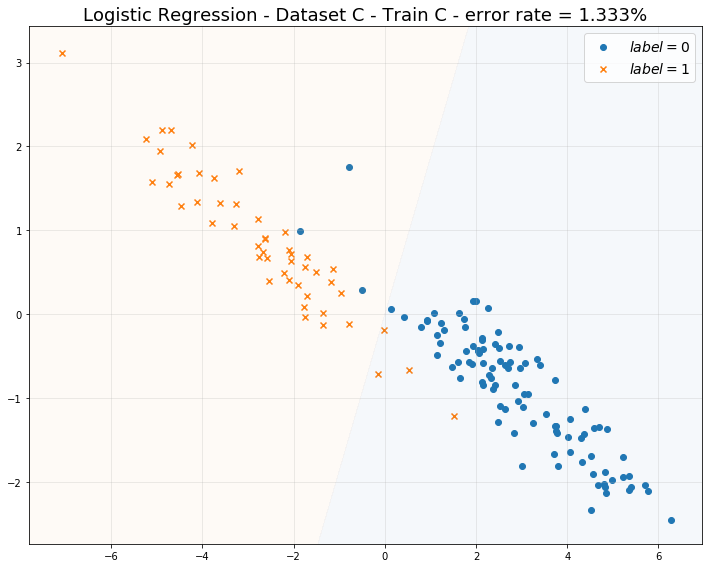

In [6]:
X = train['A'][:,:2]
y = train['A'][:,-1]
linreg = LinearRegression()
linreg.fit(X, y)
missclassification_rate = round(100*linreg.missclassification(X, y),3)
title ="Logistic Regression - Dataset C - Train C - error rate = " + str(missclassification_rate) + "%"
linreg.plot_pred(X, y, title=title)
plt.show()

## 5. QDA model

$$ Y\sim\mathcal{B}(\pi), \enspace X\,|\,Y\!=\!i\sim\mathcal{N}\left(\mu_{i}, \Sigma_{i}\right)$$

$$\hat{\pi} = \frac{1}{N}\sum_{i=1}^{n}y_{i}$$

$$\forall j\in\{0,1\}, \enspace\hat{\mu}_{j}=\frac{\sum_{i=1}^{n}\mathbb{1}_{\{y_{i}=j\}}x_{i}}{\sum_{i=1}^{n}\mathbb{1}_{\{y_{i}=j\}}}$$

$$\forall j\in\{0,1\}, \enspace\hat{\Sigma}_{j}=\frac{\sum_{i=1}^{n}\mathbb{1}_{\{y_{i}=j\}}(x_{i}-\hat{\mu}_{j})(x_{i}-\hat{\mu}_{j})^{T}}{\sum_{i=1}^{n}\mathbb{1}_{\{y_{i}=j\}}}$$

$$p(y=1|x)=\frac{1}{2}\Leftrightarrow\frac{1}{2}\log\left(\frac{\det \Sigma_{1}^{-1}}{\det \Sigma_{0}^{-1}}\right)+\frac{1}{2}\left[(x-\mu_{1})^{T}\Sigma_{1}^{-1}(x-\mu_{1})-(x-\mu_{0})^{T}\Sigma_{0}^{-1}(x-\mu_{0})\right] = \log\left(\frac{\pi}{1-\pi}\right)$$

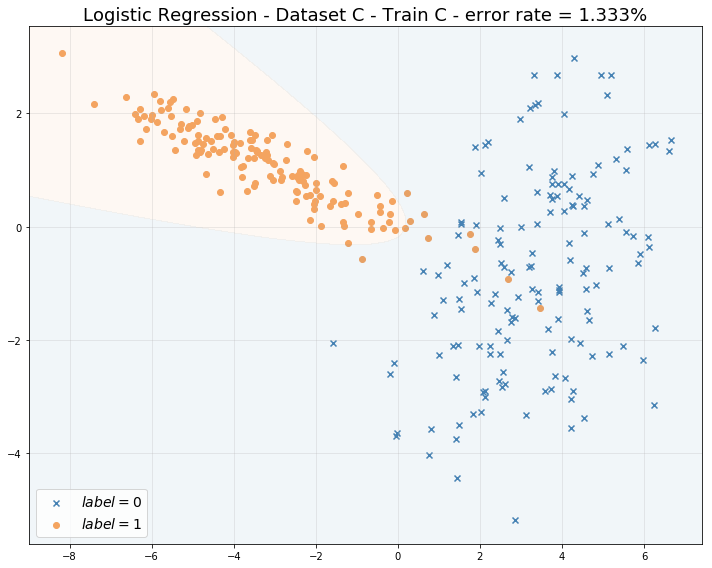

In [10]:
X = train['B'][:,:2]
y = train['B'][:,-1]
qda = QDA()
qda.fit(X, y)
missclassification_rate = round(100*qda.missclassification(X, y),3)
title ="Logistic Regression - Dataset C - Train C - error rate = " + str(missclassification_rate) + "%"
qda.plot_pred(X, y, title=title)
plt.show()